✅ Dataset Loaded

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

📌 First 5 Rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

📌 Summary Statistics:
        sepal_length  sepal_width  petal_length  petal_width species
count     1

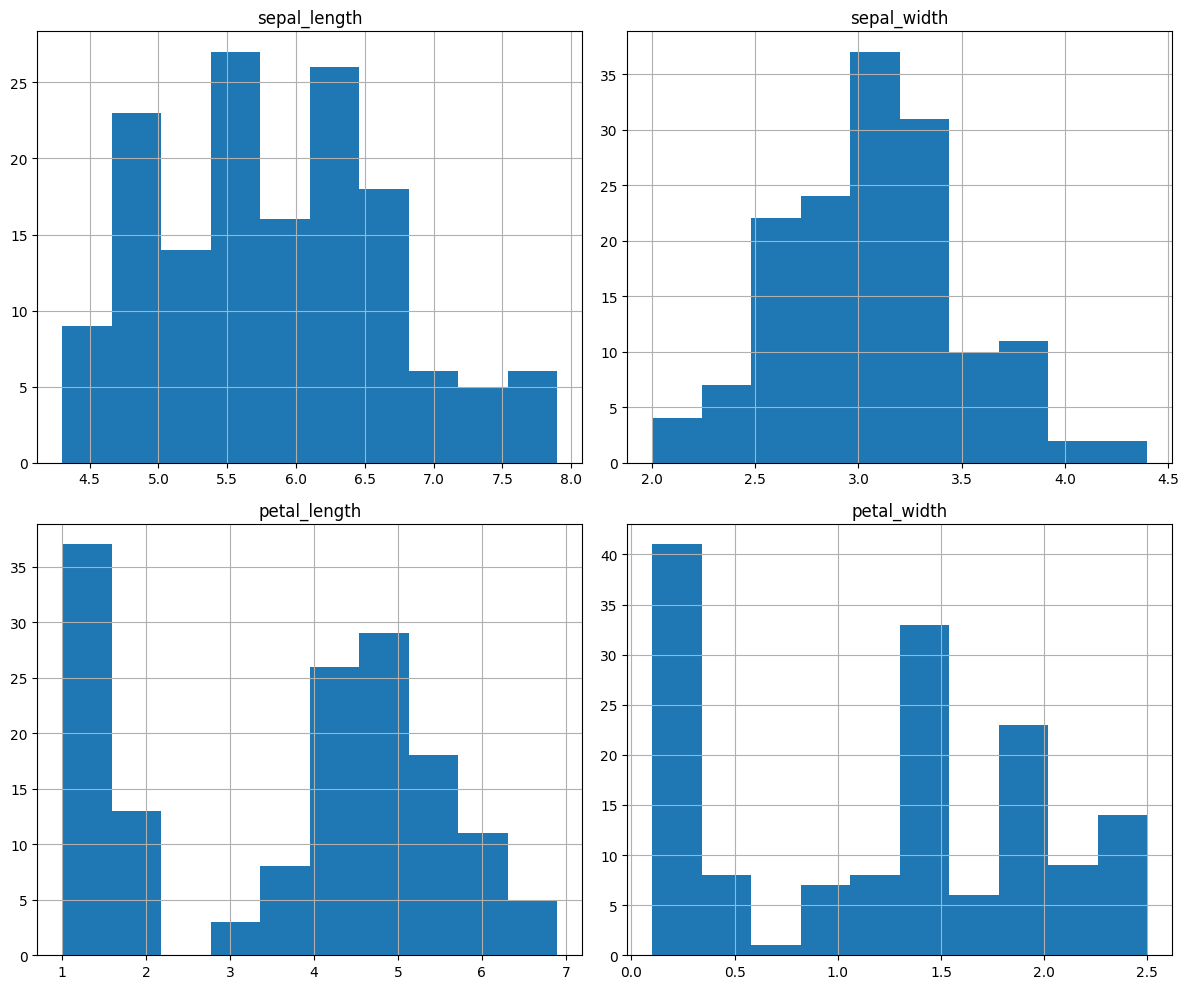

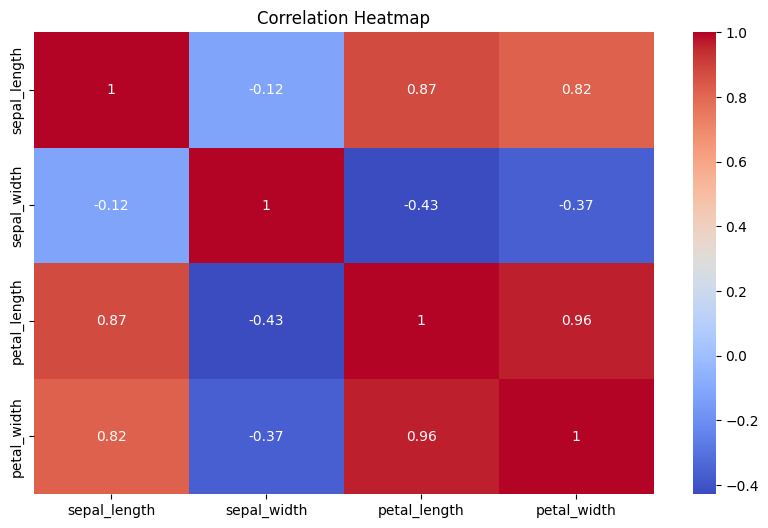

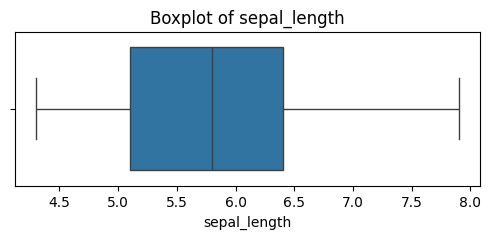

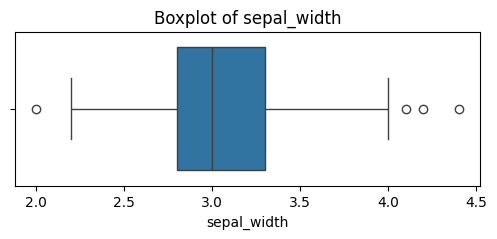

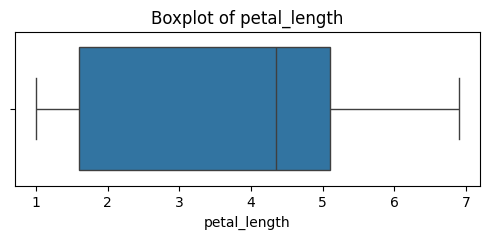

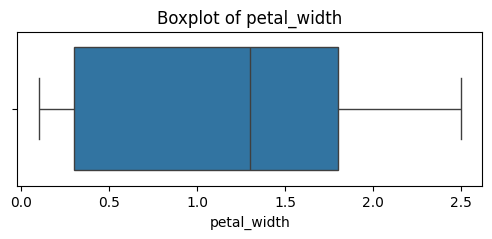


📌 Outliers Detected: 1 rows
    sepal_length  sepal_width  petal_length  petal_width species
15           5.7          4.4           1.5          0.4  setosa
Shapiro-Wilk Test for sepal_length: p = 0.0102 → Not Normal
Shapiro-Wilk Test for sepal_width: p = 0.1012 → Normal
Shapiro-Wilk Test for petal_length: p = 0.0000 → Not Normal
Shapiro-Wilk Test for petal_width: p = 0.0000 → Not Normal

✅ EDA Complete!


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, zscore, shapiro

# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print("✅ Dataset Loaded")


print("\n📌 Dataset Info:")
print(df.info())

print("\n📌 First 5 Rows:")
print(df.head())

print("\n📌 Summary Statistics:")
print(df.describe(include='all'))

print("\n📌 Missing Values:")
print(df.isnull().sum())

print("\n📌 Duplicate Rows:")
print(df.duplicated().sum())


print("\n📌 Unique Categories in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


print("\n📊 Visualizations...")

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Outlier Detection using Z-Score
z_scores = zscore(df.select_dtypes(include=np.number))
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"\n📌 Outliers Detected: {outliers.sum()} rows")
print(df[outliers])

if 'group_col' in df.columns and 'value_col' in df.columns:
    group1 = df[df['group_col'] == df['group_col'].unique()[0]]['value_col']
    group2 = df[df['group_col'] == df['group_col'].unique()[1]]['value_col']
    stat, p = ttest_ind(group1, group2)
    print(f"\n📌 T-test result between two groups: p-value = {p}")
    if p < 0.05:
        print("🔍 Significant difference found.")
    else:
        print("🔍 No significant difference.")

for col in df.select_dtypes(include=np.number).columns:
    stat, p = shapiro(df[col].dropna())
    print(f"Shapiro-Wilk Test for {col}: p = {p:.4f} → {'Normal' if p > 0.05 else 'Not Normal'}")

print("\n✅ EDA Complete!")